# DSE 207R FINAL PROJECT
## Fall 2024
### Due Date:  December 10th, 2024

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report (this notebook) and an presentation video (self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset (on GitHub) such that it can be used as a URL directly. Don't forget to add your name on top as the author of the notebook.



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

In [9]:
dataset = pd.read_csv('smmh.csv')

Data Source: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data

In [10]:
dataset.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


This dataset contains information on social media users. There are a number of demographic columns, along with a number of questions regarding social media usage among individuals and then some questions regarding these individuals mental and physical health. I decided to use this dataset because I really want to see if social media has negative effects on individuals' health. I believe that social media has done a huge amount of damage to society, in particular the younger generations health, and I would like to see if there is any correlation between social media usage and these self-reported health scores.

### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

We can see all of the columns present in our dataset here and we find that they are a combination of demographic questions, social media usage questions, and questions regadring the potential effects of social media on every day life. This helps us understand what we may want to look further into during our analysis.

In [12]:
dataset.describe()

,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The describe function helps us understand the statistics of each column. We can see that the quantitative columns are all using a 1-5 rating scale except for the age column. It is also important to note that 5 is the high end of this scale and 1 is the low end. No issues are present here but something notable is that 75% of individuals in this dataset are 26 years old or younger at the time of this survey. We also see that the column containing information on the average amount of time spent on social media each day is not included here. It is likely a string instead of an integer or float so lets take a closer look first.

In [13]:
dataset['8. What is the average time you spend on social media every day?'].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

We see the data is split into 6 categories. This is important to know for future analysis. We will now look into any potential null values present in the dataset.

In [14]:
dataset.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

We see that the only column with null values present is the 'What type of organization are you affiliated with?' column which we will deal with below.

In [15]:
dataset['5. What type of organizations are you affiliated with?'].unique()

array(['University', 'Private', nan, 'School, University', 'Company',
       'School, Private', 'University, Company', 'Goverment',
       'Company, Private', 'School', 'University, Goverment, Private',
       'University, Company, Private', 'University, Private',
       'University, N/A', 'School, University, Private',
       'University, Goverment', 'University, Company, Goverment',
       'School, Company', 'School, N/A'], dtype=object)

To fix this I will replace all nan values in this column with "No response".

In [16]:
dataset.fillna("No response", inplace=True)

In [17]:
dataset['5. What type of organizations are you affiliated with?'].unique()

array(['University', 'Private', 'No response', 'School, University',
       'Company', 'School, Private', 'University, Company', 'Goverment',
       'Company, Private', 'School', 'University, Goverment, Private',
       'University, Company, Private', 'University, Private',
       'University, N/A', 'School, University, Private',
       'University, Goverment', 'University, Company, Goverment',
       'School, Company', 'School, N/A'], dtype=object)

Now lets look at how our numeric data is distributed and any correlations between columns.

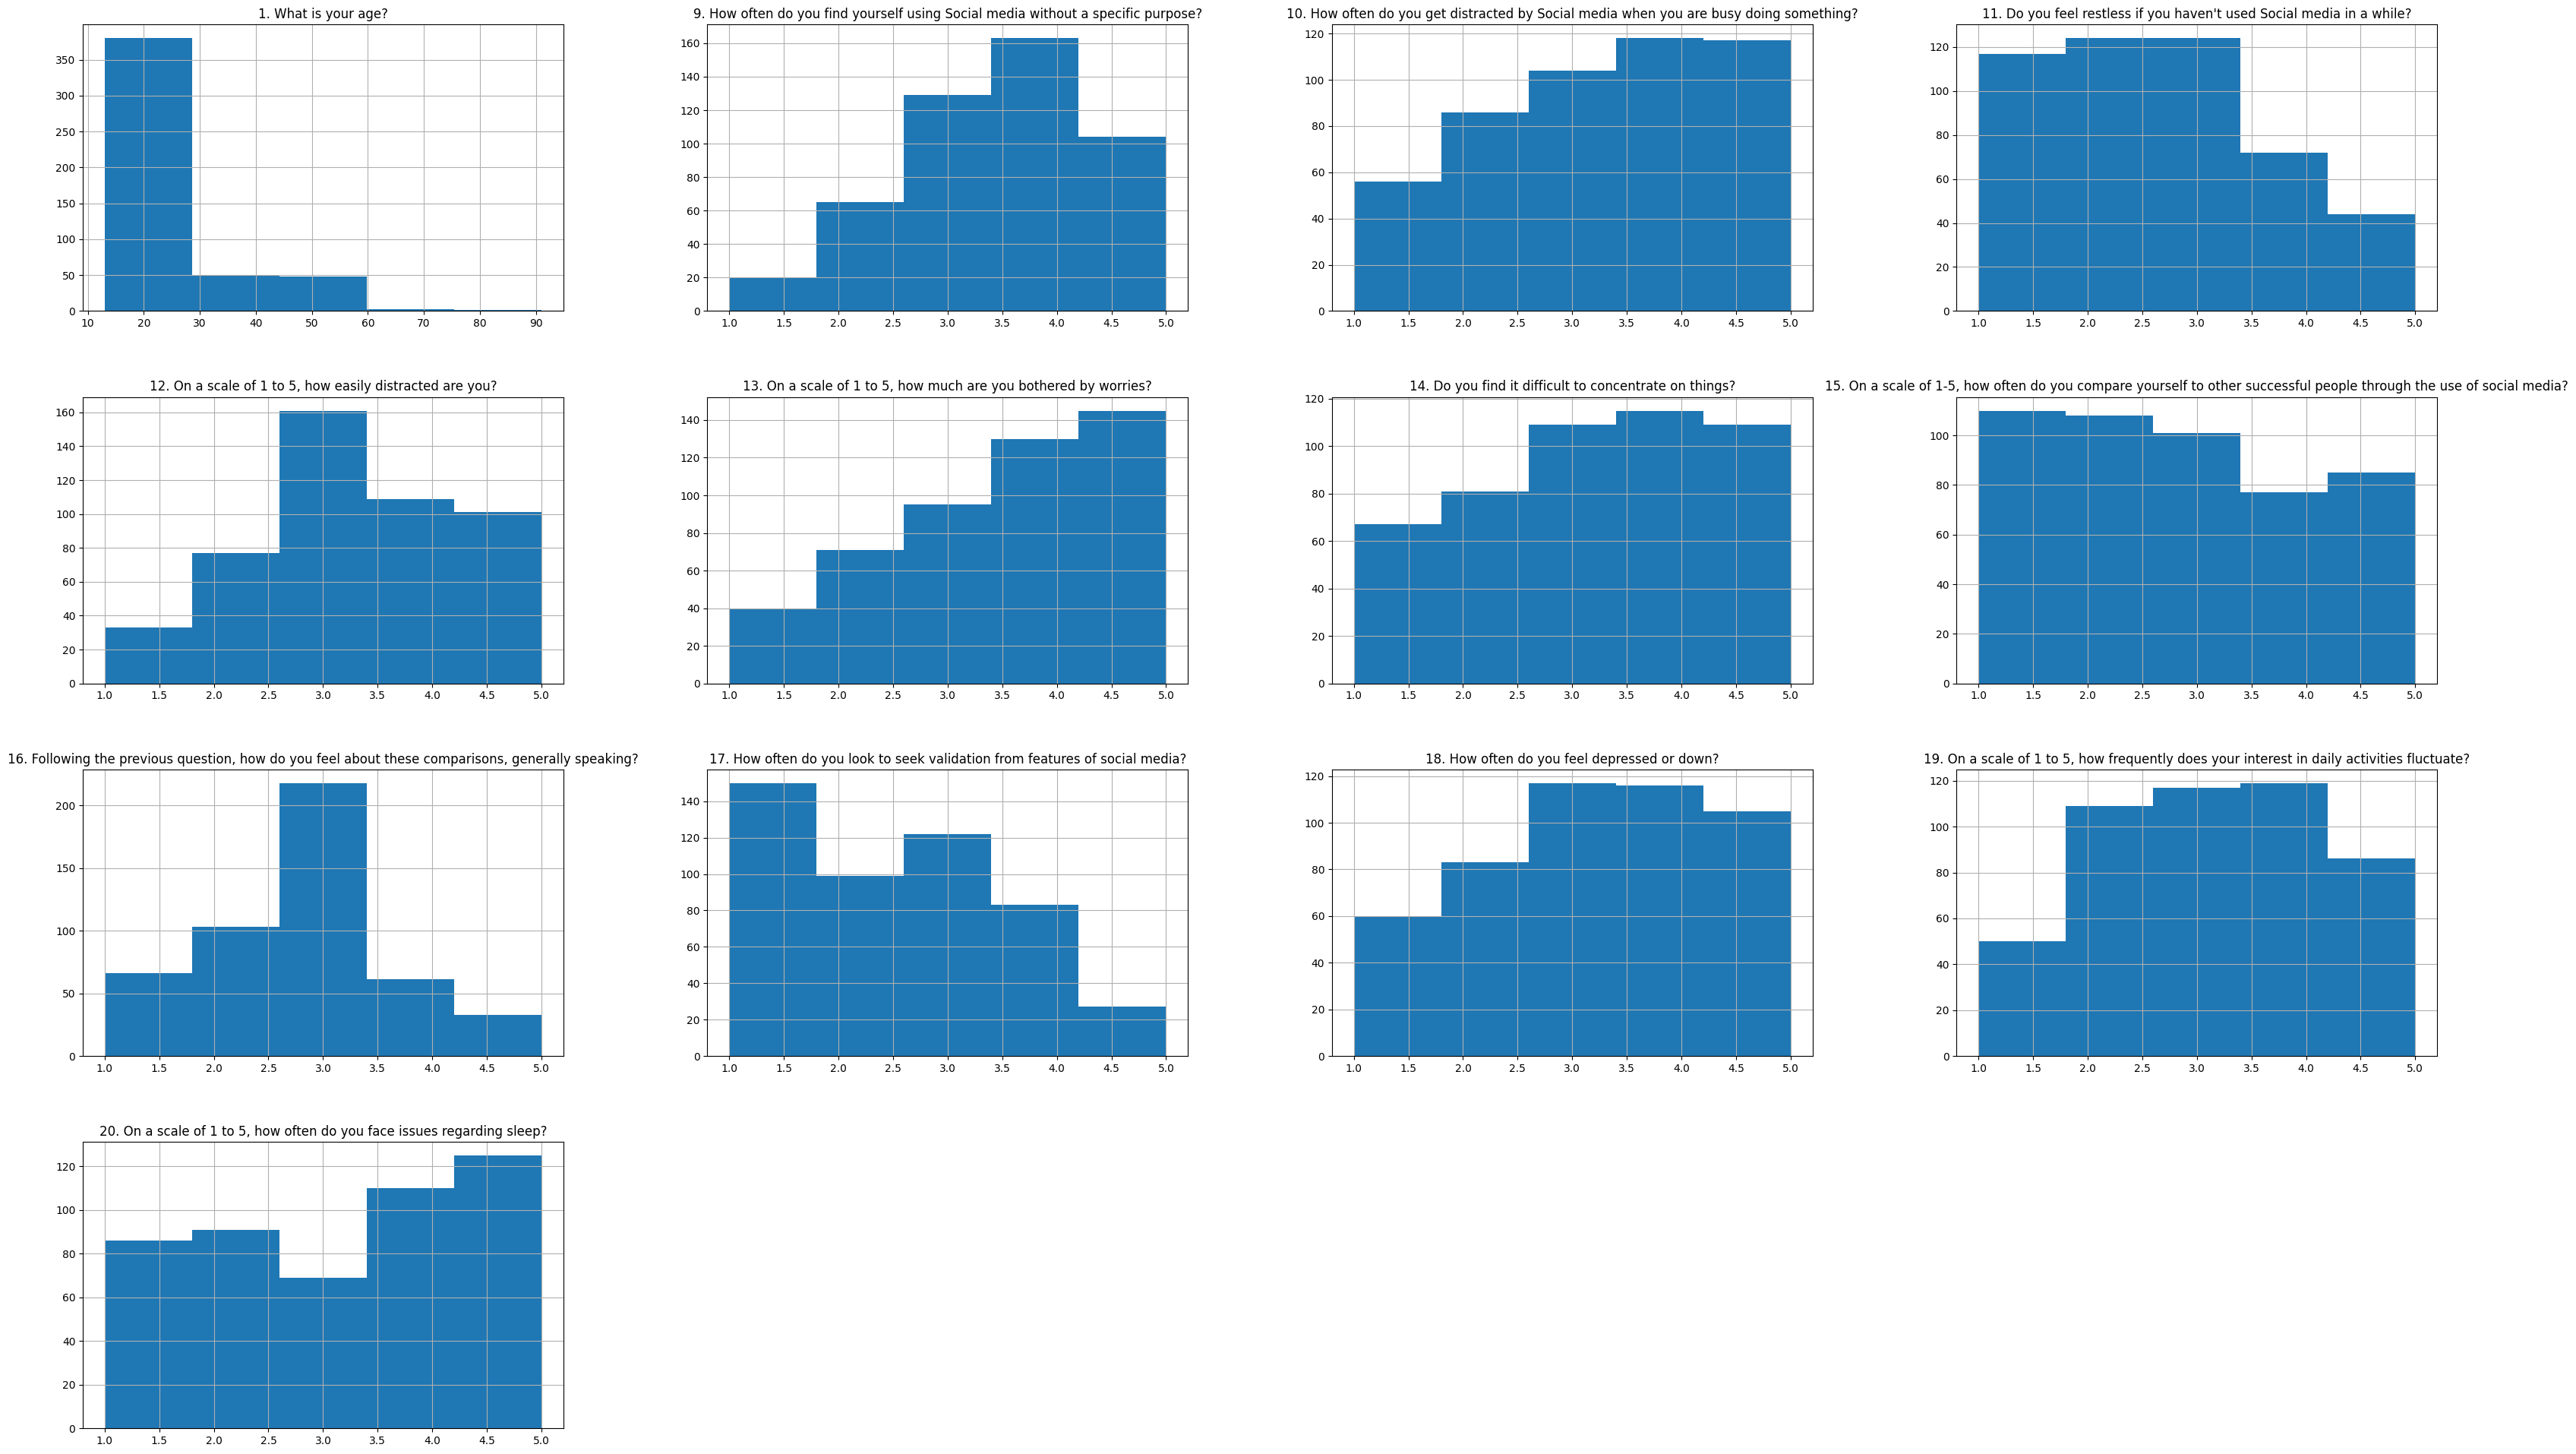

In [18]:
dataset.hist(figsize=(40, 24), bins=5)
plt.show()

We can see the distribution of all the quantitative columns here and see that the majority of individuals in this survey are under the age of 30. In our other columns that are rated 1-5, we see lots of different distributions. We see that every column has at least 20 entries for each rating which is helpful in our analysis.

We can now look at the correlation between numeric columns to get a better idea of what might be interesting to look further into. Since social media usage per day isn't a numeric column we will create a new column using an appropriate mapping so we can see how correlated social media usage is with these other columns.

In [19]:
time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5
}
dataset['TimeSpentNumeric'] = dataset['8. What is the average time you spend on social media every day?'].map(time_mapping)

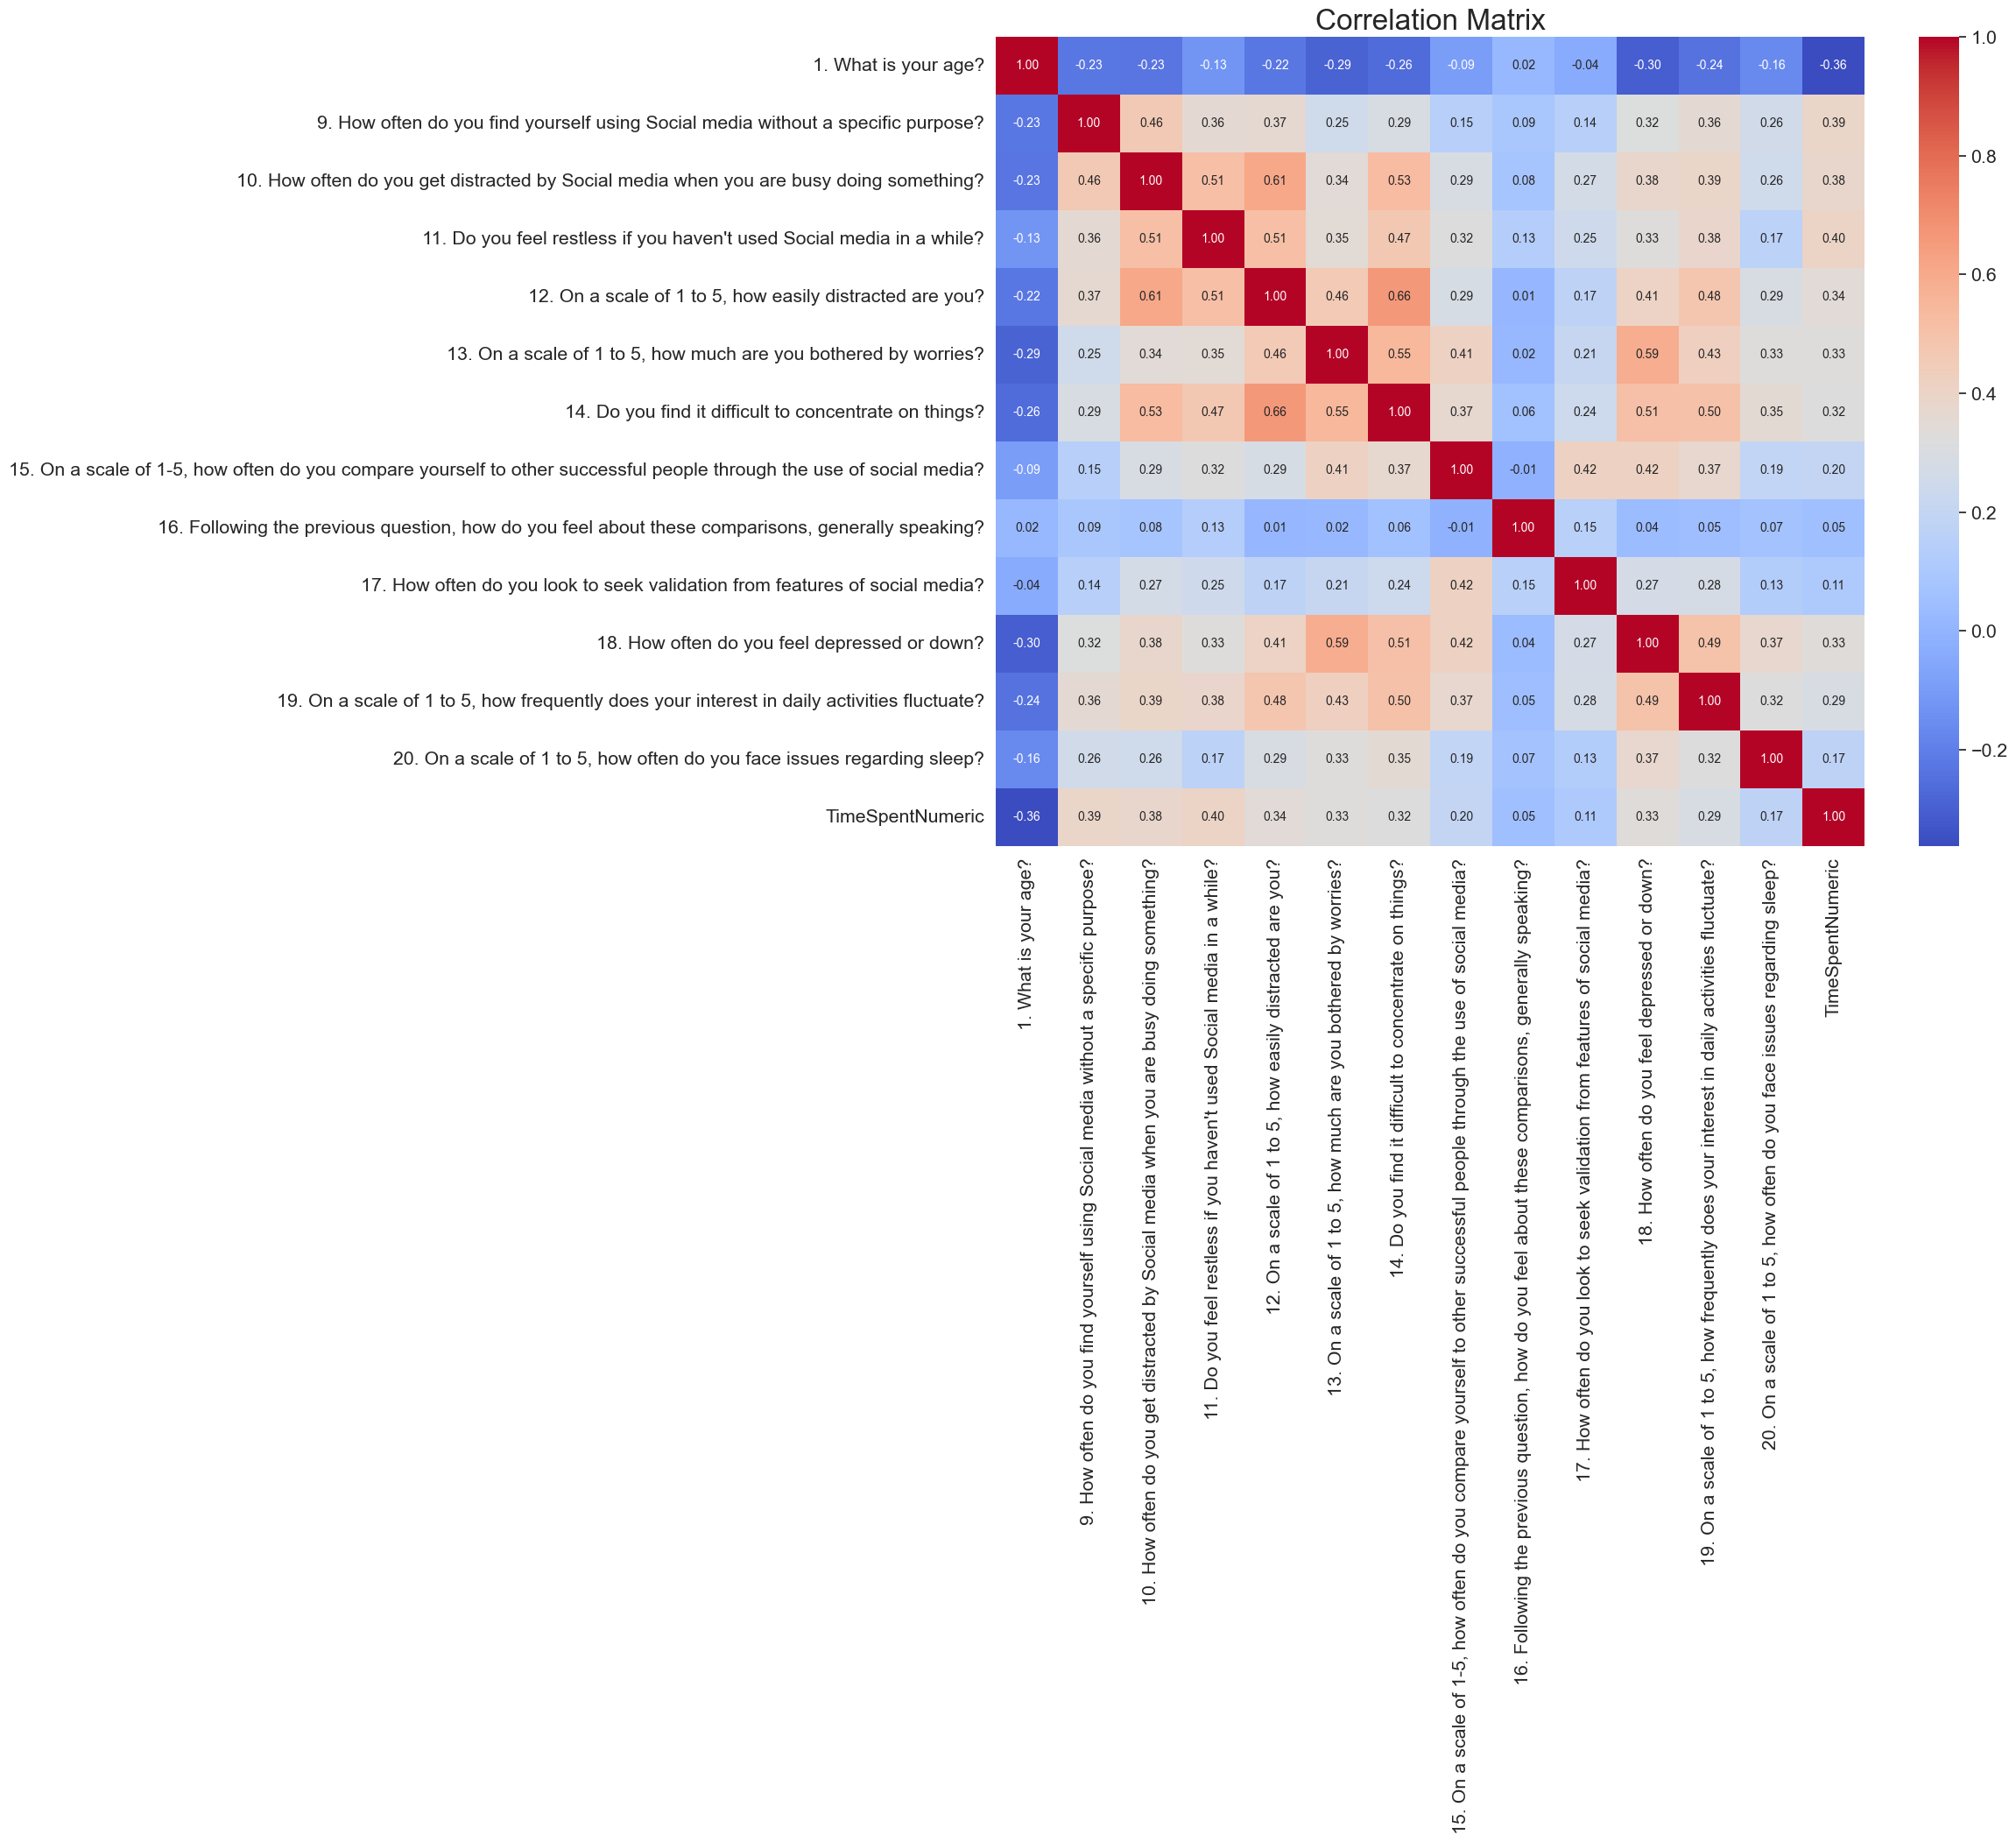

In [20]:
corr_data = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.4)

sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=24)
plt.show()

This correlation matrix heatmap provides us with tons of information on potential connections between columns. Something very notable is that every column, except for age, has a positive correlation with TimeSpentNumeric which is the amount of time a user is on social media per day. This is something we will need to look into further but it is showing early signs of positive correlation between social media usage and self-percieved lack of health.

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



### **1. Is social media usage strongly correlated with the lack of productivity and focus in individuals?**

In [21]:
prod_columns = [
    "TimeSpentNumeric",
    "10. How often do you get distracted by Social media when you are busy doing something?",
    "12. On a scale of 1 to 5, how easily distracted are you?",
    "14. Do you find it difficult to concentrate on things?"
]

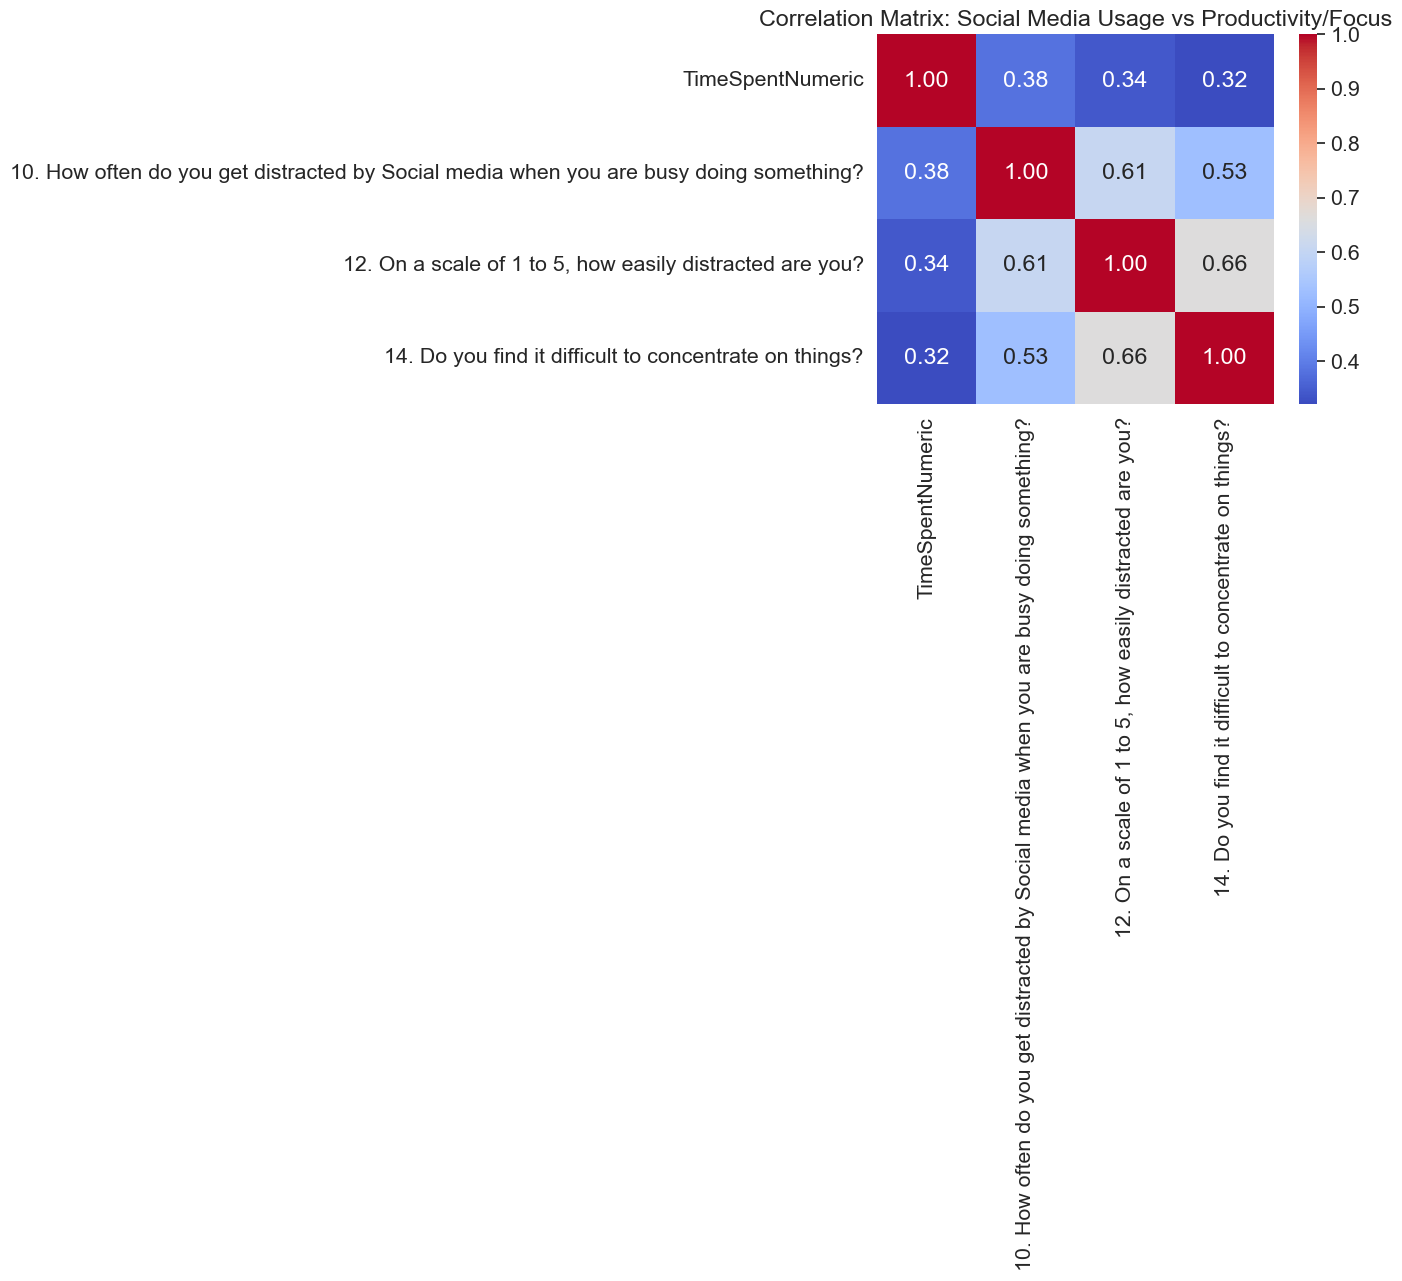

<Figure size 1000x1200 with 0 Axes>

In [22]:
corr_matrix = dataset[prod_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Social Media Usage vs Productivity/Focus")
plt.figure(figsize=(10, 12))
plt.show()

Above we see a correlation matrix showing just the columns of interest for this research question. We see that there are some fairly strong positive correlations present. Next we will model the data with line graphs and get the formulas for the lines of best fit.

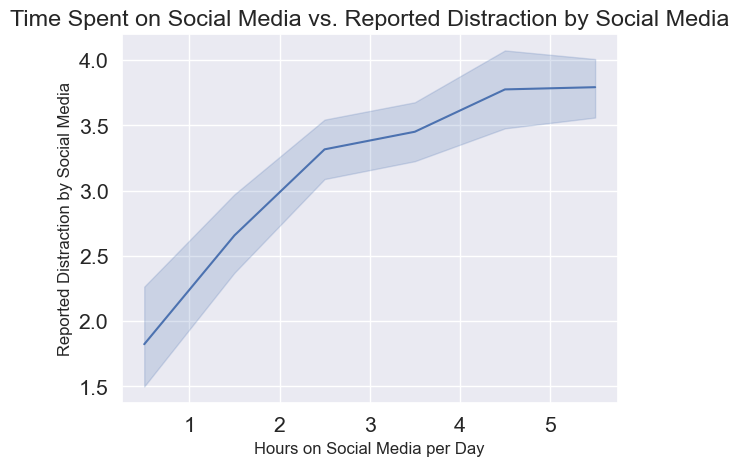

In [23]:
sns.lineplot(data=dataset, x="TimeSpentNumeric", y="10. How often do you get distracted by Social media when you are busy doing something?")
plt.title("Time Spent on Social Media vs. Reported Distraction by Social Media")
plt.xlabel("Hours on Social Media per Day", fontsize=12)
plt.ylabel("Reported Distraction by Social Media", fontsize=12)
plt.show()

In [24]:
X = dataset[["TimeSpentNumeric"]].values
y = dataset["10. How often do you get distracted by Social media when you are busy doing something?"].values
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficient: 0.31803562804621166
Intercept: 2.2361342782083904
R-squared: 0.1450222472455086


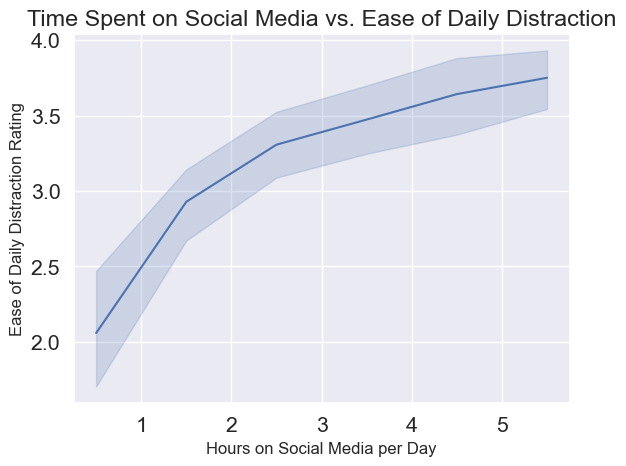

In [25]:
sns.lineplot(data=dataset, x="TimeSpentNumeric", y="12. On a scale of 1 to 5, how easily distracted are you?")
plt.title("Time Spent on Social Media vs. Ease of Daily Distraction")
plt.xlabel("Hours on Social Media per Day", fontsize=12)
plt.ylabel("Ease of Daily Distraction Rating", fontsize=12)
plt.show()

In [26]:
X = dataset[["TimeSpentNumeric"]].values
y = dataset["12. On a scale of 1 to 5, how easily distracted are you?"].values
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficient: 0.2531913508996064
Intercept: 2.4862635762995744
R-squared: 0.11732293840744135


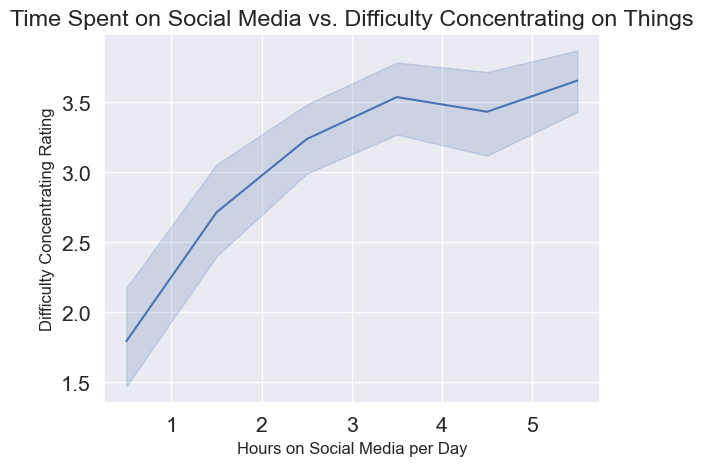

In [27]:
sns.lineplot(data=dataset, x="TimeSpentNumeric", y="14. Do you find it difficult to concentrate on things?")
plt.title("Time Spent on Social Media vs. Difficulty Concentrating on Things")
plt.xlabel("Hours on Social Media per Day", fontsize=12)
plt.ylabel("Difficulty Concentrating Rating", fontsize=12)
plt.show()

In [28]:
X = dataset[["TimeSpentNumeric"]].values
y = dataset["14. Do you find it difficult to concentrate on things?"].values
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficient: 0.2724884487996684
Intercept: 2.316538852791983
R-squared: 0.10348130218774532


/var/folders/pb/7hrkp8tj05gbr513hzd6bv000000gp/T/ipykernel_75279/2634153301.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset.groupby("UsageCategory")[["10. How often do you get distracted by Social media when you are busy doing something?",


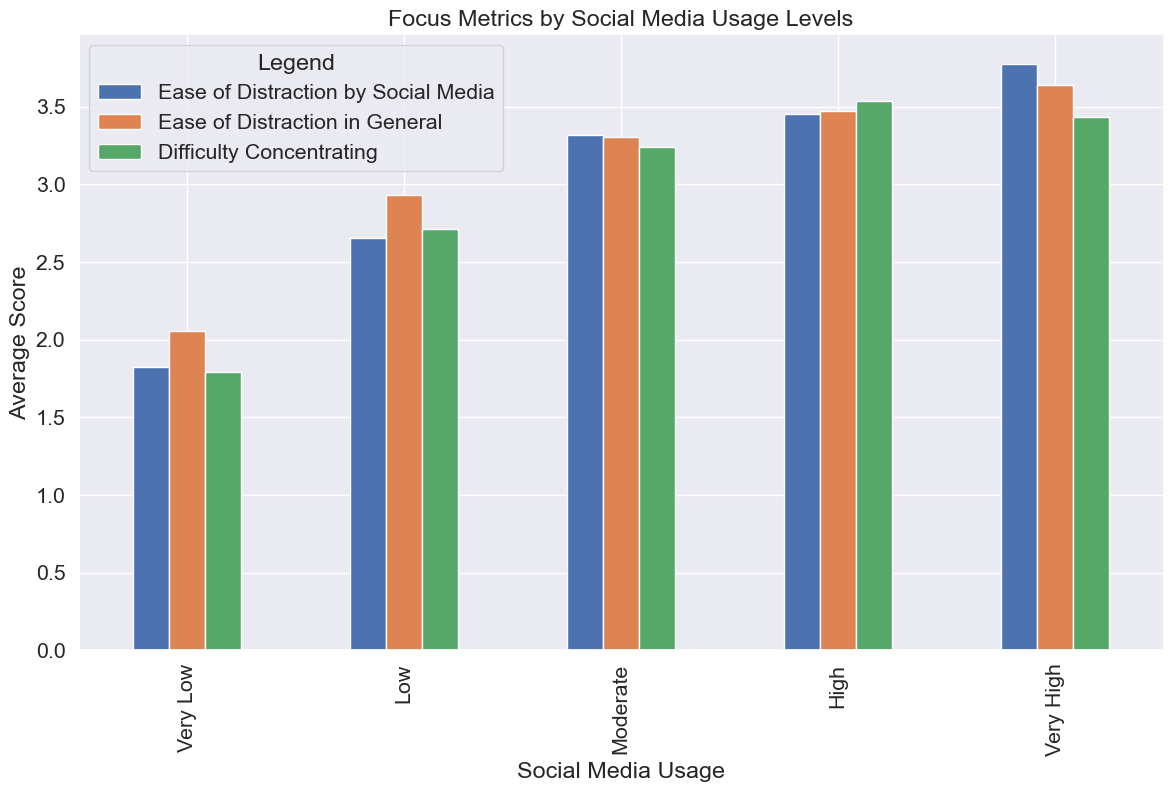

In [29]:
bins = [0, 1, 2, 3, 4, 5]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

dataset["UsageCategory"] = pd.cut(dataset["TimeSpentNumeric"], bins=bins, labels=labels)

grouped = dataset.groupby("UsageCategory")[["10. How often do you get distracted by Social media when you are busy doing something?",
                                            "12. On a scale of 1 to 5, how easily distracted are you?",
                                            "14. Do you find it difficult to concentrate on things?"]].mean()
legend_labels = ["Ease of Distraction by Social Media", "Ease of Distraction in General", "Difficulty Concentrating"]
ax = grouped.plot(kind="bar", figsize=(14, 8))
ax.legend(labels=legend_labels, title="Legend")

plt.title("Focus Metrics by Social Media Usage Levels")
plt.ylabel("Average Score")
plt.xlabel("Social Media Usage")

plt.show()

Here we are splitting the amount of social media use into 5 categories and seeing how the average scores of users change across these different groups. This helps visualize all the data for this question in one easily interpretable graph.

### **2. Is social media usage strongly correlated with a decrease in self-perceived mental health factors?**

In [30]:
health_columns = [
    "TimeSpentNumeric",
    '13. On a scale of 1 to 5, how much are you bothered by worries?',
    '18. How often do you feel depressed or down?',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?'
]

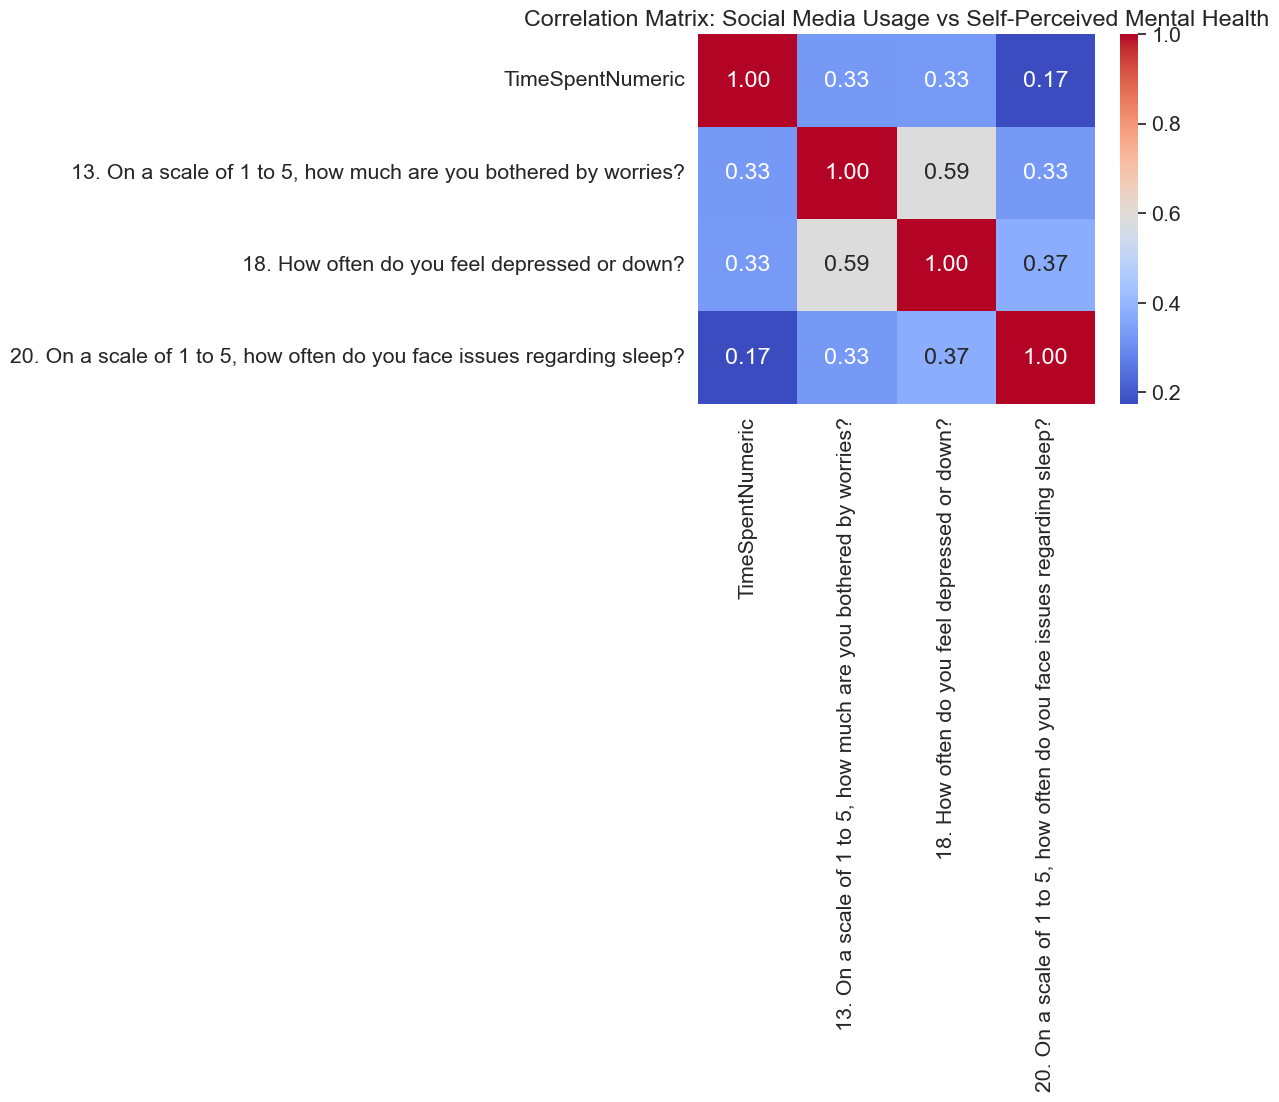

<Figure size 1000x1200 with 0 Axes>

In [31]:
corr_matrix = dataset[health_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Social Media Usage vs Self-Perceived Mental Health")
plt.figure(figsize=(10, 12))
plt.show()

Above we see a correlation matrix showing just the columns of interest for this research question. We see that there are some positive correlations present. Next we will model the data with line graphs and get the formulas for the lines of best fit.

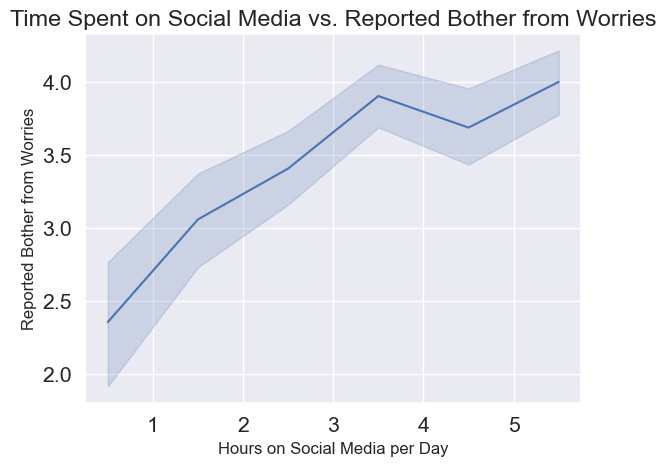

In [32]:
sns.lineplot(data=dataset, x="TimeSpentNumeric", y="13. On a scale of 1 to 5, how much are you bothered by worries?")
plt.title("Time Spent on Social Media vs. Reported Bother from Worries")
plt.xlabel("Hours on Social Media per Day", fontsize=12)
plt.ylabel("Reported Bother from Worries", fontsize=12)
plt.show()

In [33]:
X = dataset[["TimeSpentNumeric"]].values
y = dataset["13. On a scale of 1 to 5, how much are you bothered by worries?"].values
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficient: 0.2632731768969143
Intercept: 2.6618786413253828
R-squared: 0.10643572491858089


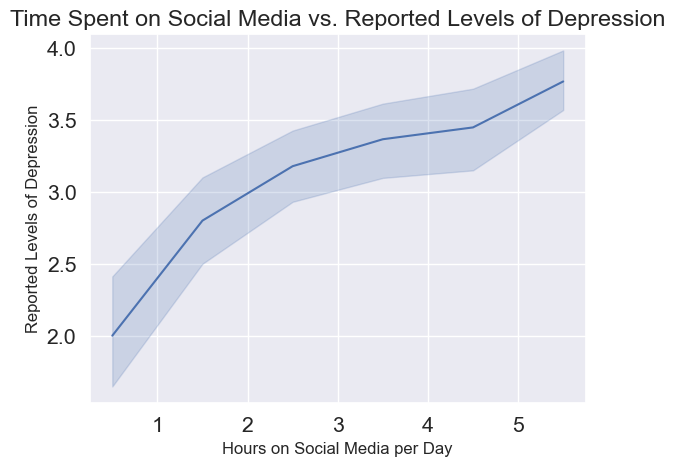

In [34]:
sns.lineplot(data=dataset, x="TimeSpentNumeric", y="18. How often do you feel depressed or down?")
plt.title("Time Spent on Social Media vs. Reported Levels of Depression")
plt.xlabel("Hours on Social Media per Day", fontsize=12)
plt.ylabel("Reported Levels of Depression", fontsize=12)
plt.show()

In [35]:
X = dataset[["TimeSpentNumeric"]].values
y = dataset["18. How often do you feel depressed or down?"].values
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficient: 0.27286521144947445
Intercept: 2.32564965868729
R-squared: 0.10922286112465185


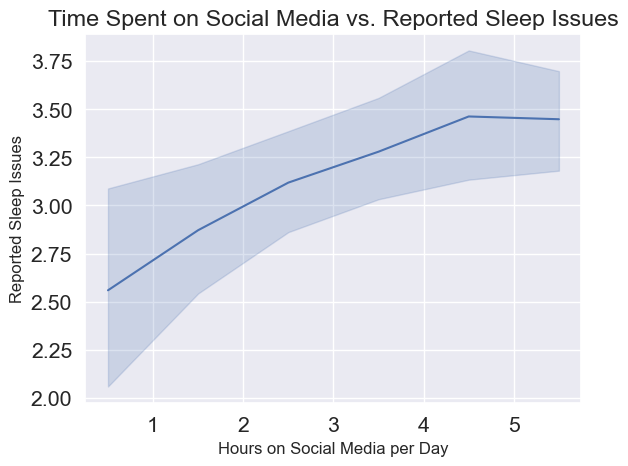

In [36]:
sns.lineplot(data=dataset, x="TimeSpentNumeric", y="20. On a scale of 1 to 5, how often do you face issues regarding sleep?")
plt.title("Time Spent on Social Media vs. Reported Sleep Issues")
plt.xlabel("Hours on Social Media per Day", fontsize=12)
plt.ylabel("Reported Sleep Issues", fontsize=12)
plt.show()

In [37]:
X = dataset[["TimeSpentNumeric"]].values
y = dataset["20. On a scale of 1 to 5, how often do you face issues regarding sleep?"].values
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficient: 0.16052486462232976
Intercept: 2.6545103626854267
R-squared: 0.030505959947184302


/var/folders/pb/7hrkp8tj05gbr513hzd6bv000000gp/T/ipykernel_75279/3589459851.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset.groupby("UsageCategory")[["13. On a scale of 1 to 5, how much are you bothered by worries?",


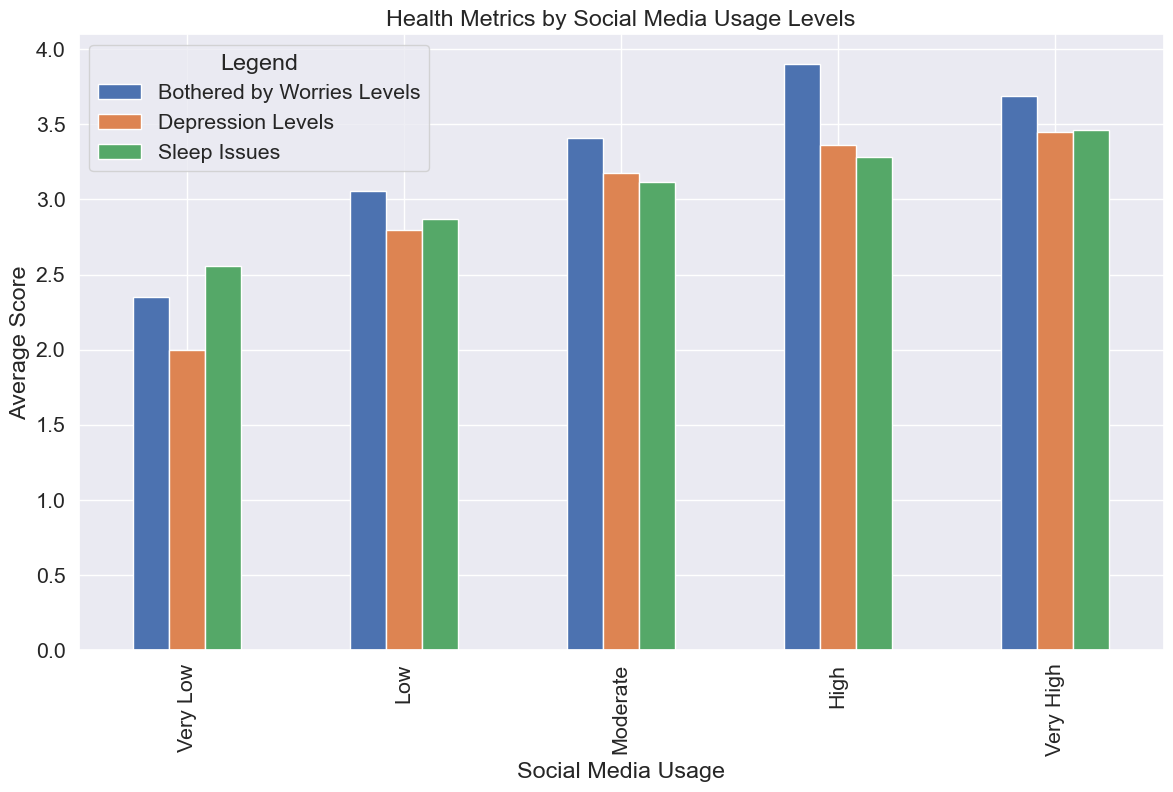

In [38]:
bins = [0, 1, 2, 3, 4, 5]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

dataset["UsageCategory"] = pd.cut(dataset["TimeSpentNumeric"], bins=bins, labels=labels)

grouped = dataset.groupby("UsageCategory")[["13. On a scale of 1 to 5, how much are you bothered by worries?",
                                            "18. How often do you feel depressed or down?",
                                            "20. On a scale of 1 to 5, how often do you face issues regarding sleep?"]].mean()
legend_labels = ["Bothered by Worries Levels", "Depression Levels", "Sleep Issues"]
ax = grouped.plot(kind="bar", figsize=(14, 8))
ax.legend(labels=legend_labels, title="Legend")

plt.title("Health Metrics by Social Media Usage Levels")
plt.ylabel("Average Score")
plt.xlabel("Social Media Usage")

plt.show()

Here we are splitting the amount of social media use into 5 categories again and seeing how the average scores of users change across these different groups. This helps visualize all the data for this question in one easily interpretable graph.

### **3. Do the present correlated effects of social media on health and focus have a stronger effect among different age groups?**

First we need to split the data into two groups, one for users who are 25 and older and another for those who are younger than 25.

In [39]:
dataset["AgeGroup"] = dataset["1. What is your age?"].apply(lambda x: "Younger than 25" if x < 25 else "25 and Older")

In [40]:
dataset['AgeGroup'].value_counts()

AgeGroup
Younger than 25    328
25 and Older       153
Name: count, dtype: int64

Null Hypothesis (H0): There is no significant difference between the 25 and older and under 25 age groups for each of the focus metrics.

Alternative Hypothesis (H1): There is a significant difference between the 25 and older and under 25 age groups for each of the focus metrics.

We are given that the dataset used was obtained through random sampling and the sample observations are independent. We also have > 30 samples in each group so we can go forth with our hypothesis testing.

In [41]:
younger_than_25 = dataset[dataset["AgeGroup"] == "Younger than 25"]
older_25_and_up = dataset[dataset["AgeGroup"] == "25 and Older"]

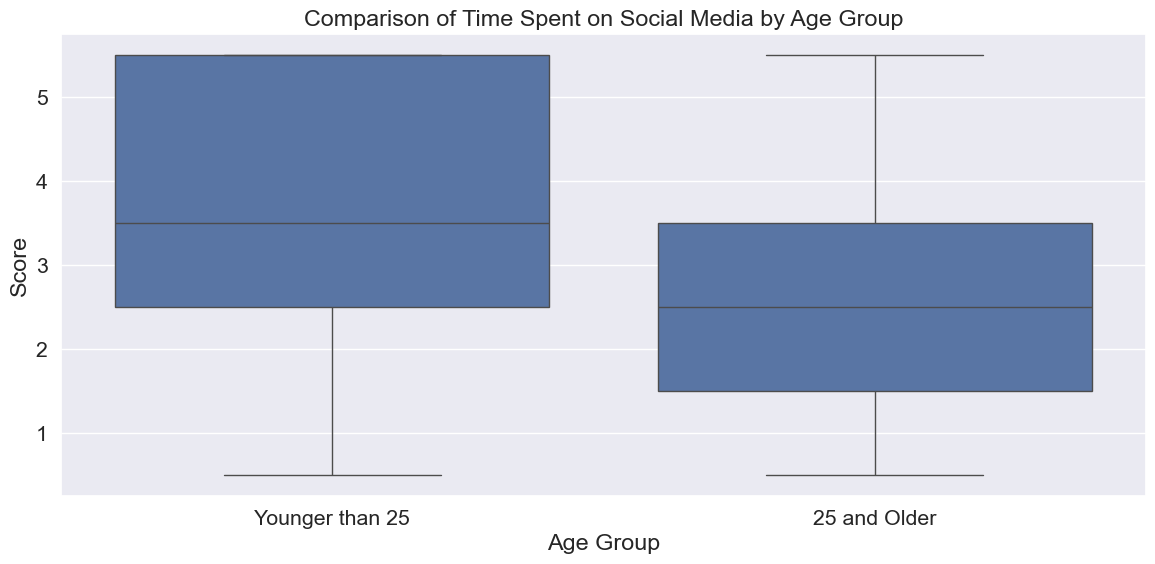

AgeGroup
25 and Older       2.650327
Younger than 25    3.762195
Name: TimeSpentNumeric, dtype: float64


In [50]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="AgeGroup", y='TimeSpentNumeric', data=dataset)
plt.title("Comparison of Time Spent on Social Media by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Score")
plt.show()
mean_values = dataset.groupby("AgeGroup")["TimeSpentNumeric"].mean()
print(mean_values)

We see that the younger generation uses social media for an average of 3.76 hours per day versus 2.65 hours per day for individuals 25 and older. This is interesting to see and we may see more damaging affects on the younger generation do this excessive usage.

In [43]:
focus_columns = [
    "10. How often do you get distracted by Social media when you are busy doing something?",
    "12. On a scale of 1 to 5, how easily distracted are you?",
    "14. Do you find it difficult to concentrate on things?",
]

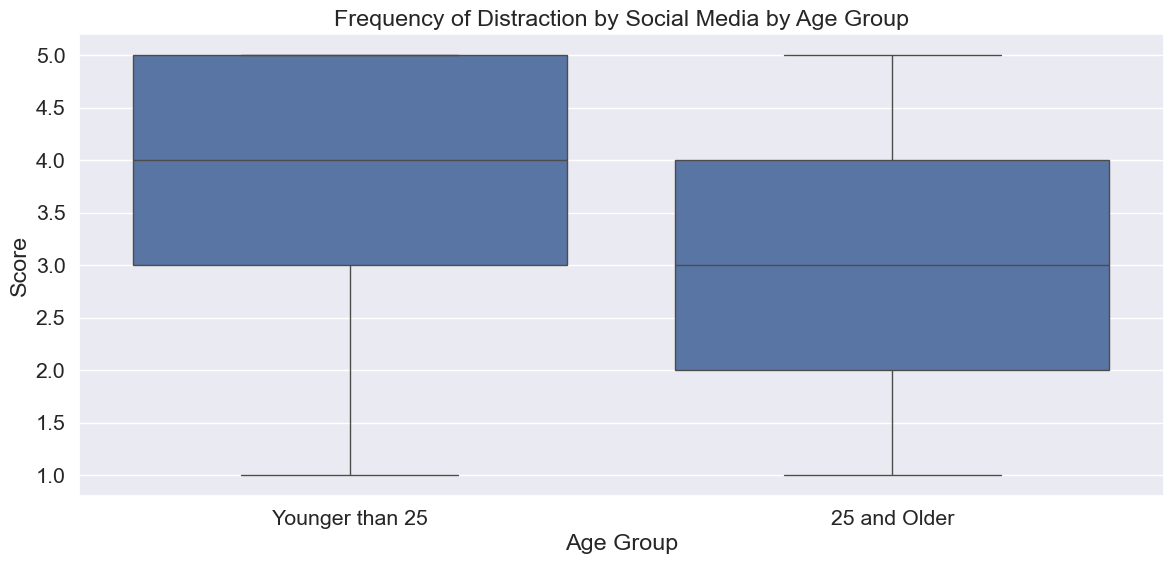

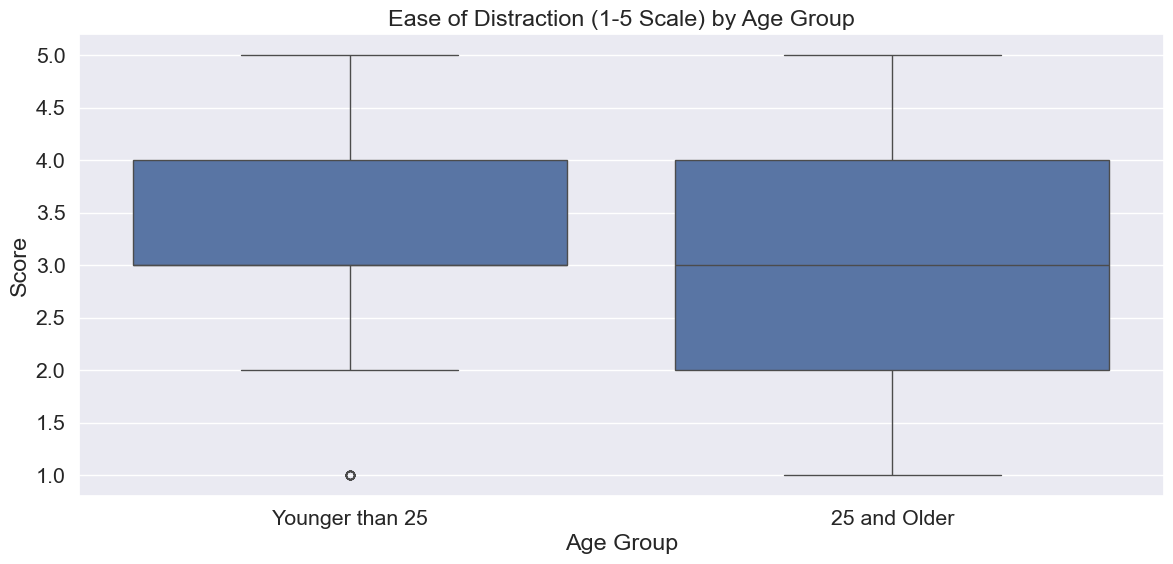

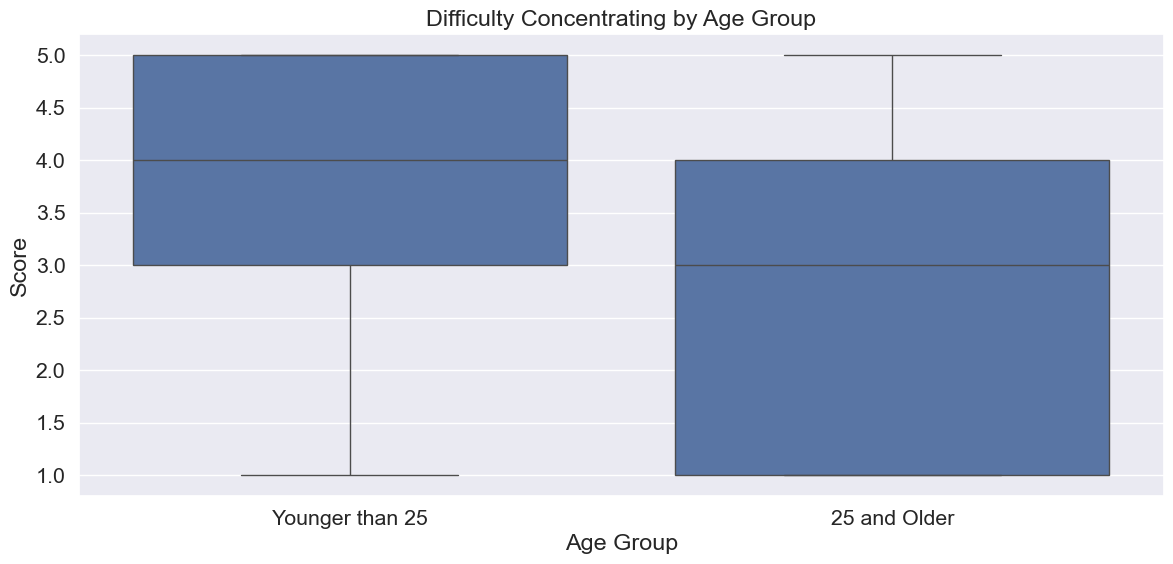

In [44]:
titles = {
    "10. How often do you get distracted by Social media when you are busy doing something?": "Frequency of Distraction by Social Media by Age Group",
    "12. On a scale of 1 to 5, how easily distracted are you?": "Ease of Distraction (1-5 Scale) by Age Group",
    "14. Do you find it difficult to concentrate on things?": "Difficulty Concentrating by Age Group"
}

for column in focus_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x="AgeGroup", y=column, data=dataset)
    plt.title(titles.get(column, f"Comparison of {column} by Age Group"))
    plt.xlabel("Age Group")
    plt.ylabel("Score")
    plt.show()

In [45]:
for column in focus_columns:
    t_stat, p_value = ttest_ind(
        younger_than_25[column].dropna(),
        older_25_and_up[column].dropna(),
        equal_var=False
    )
    print(f"Focus Metric: {column[4:]}")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("Result: Significant difference between age groups\n")
    else:
        print("Result: No significant difference between age groups\n")

Focus Metric: How often do you get distracted by Social media when you are busy doing something?
T-statistic: 3.189, P-value: 0.002
Result: Significant difference between age groups

Focus Metric: On a scale of 1 to 5, how easily distracted are you?
T-statistic: 4.446, P-value: 0.000
Result: Significant difference between age groups

Focus Metric: Do you find it difficult to concentrate on things?
T-statistic: 4.874, P-value: 0.000
Result: Significant difference between age groups



Null Hypothesis (H0): There is no significant difference between the 25 and older and under 25 age groups for each of the health metrics.

Alternative Hypothesis (H1): There is a significant difference between the 25 and older and under 25 age groups for each of the health metrics.

In [46]:
health_columns = [
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "18. How often do you feel depressed or down?",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
]

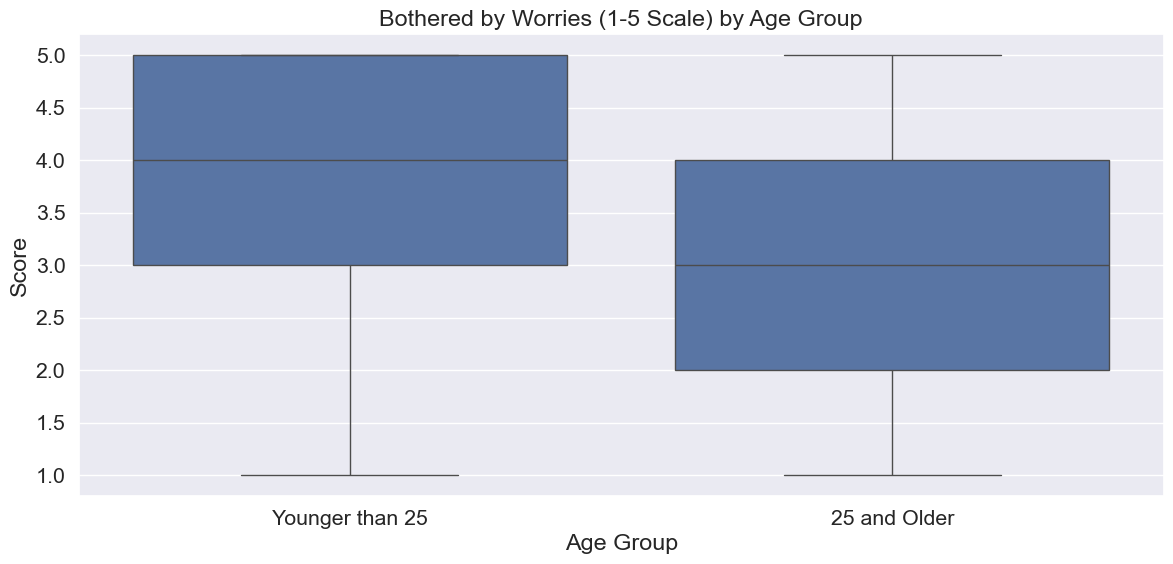

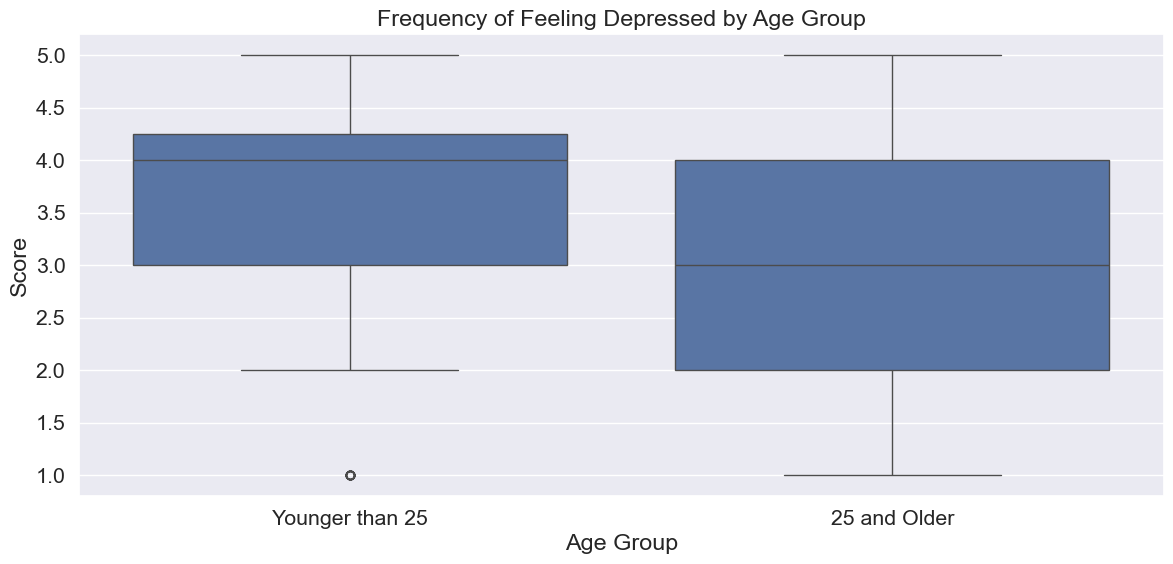

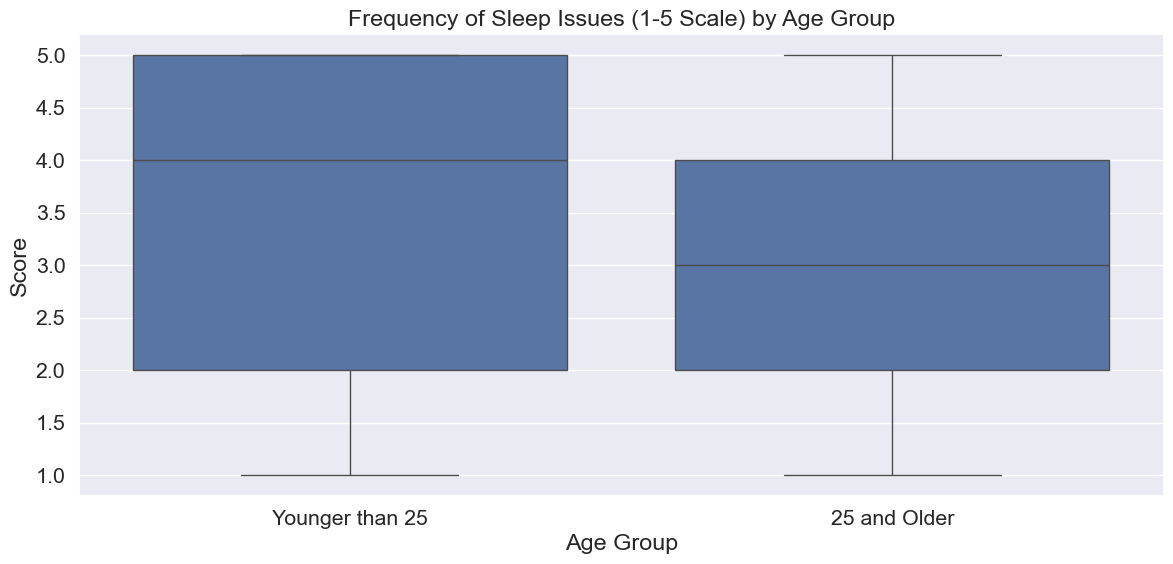

In [47]:
health_titles = {
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "Bothered by Worries (1-5 Scale) by Age Group",
    "18. How often do you feel depressed or down?": "Frequency of Feeling Depressed by Age Group",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "Frequency of Sleep Issues (1-5 Scale) by Age Group"
}

for column in health_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x="AgeGroup", y=column, data=dataset)
    plt.title(health_titles.get(column, f"Comparison of {column} by Age Group"))
    plt.xlabel("Age Group")
    plt.ylabel("Score")
    plt.show()

In [48]:
for column in health_columns:
    t_stat, p_value = ttest_ind(
        younger_than_25[column].dropna(),
        older_25_and_up[column].dropna(),
        equal_var=False
    )
    print(f"Focus Metric: {column[4:]}")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("Result: Significant difference between age groups\n")
    else:
        print("Result: No significant difference between age groups\n")

Focus Metric: On a scale of 1 to 5, how much are you bothered by worries?
T-statistic: 5.101, P-value: 0.000
Result: Significant difference between age groups

Focus Metric: How often do you feel depressed or down?
T-statistic: 4.991, P-value: 0.000
Result: Significant difference between age groups

Focus Metric: On a scale of 1 to 5, how often do you face issues regarding sleep?
T-statistic: 2.870, P-value: 0.004
Result: Significant difference between age groups



### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


### **1. Is social media usage strongly correlated with the lack of productivity and focus in individuals?**


**Justification:**

I chose to model the data for this question with line charts because after seeing the correlation matrix I assumed we would see a positive correlation between social media usage and the focus/productivity columns. We were dealing with two quantitative variables so line plots were a great way to visualize the present trends.

I then decided to group the data into varying amounts of daily usage and create a bar chart so that these trends for all three focus/productivity columns could easily be viewed together. This provided an overarching view of how these values changed on the same scale which was my goal in the beginning.

**Inference/Conclusions:**

From this analysis I obtained some very interesting information. In the line graphs it is clear that as social media usage increased, there was also an increase in peoples levels of general distraction, distraction by social media, and difficulty concentrating.

**How often do you get distracted by social media when you are busy doing something?**

In the creation of the line charts I also did simple linear regression and obtained the line of best fit for these variables. The equation we got for our line was y = 0.318x + 2.236 with a R-squared value of 0.145. This tells us that for every 1 unit increase in social media usage, the predicted increase in distraction by social media is 0.318. It also tells us that users who don't use social media at all are predicted to have a distraction score of 2.236. This clearly shows that as social media usage increases, distraction levels do as well. We also got an R-squared value of 0.145. This is relatively low and means that while the use of social media does have an effect on levels of distraction from social media, it is certainly not the only factor at play. With that being said we do see a correlation here.


**On a scale from 1-5, how easily distracted are you?**

The line chart created for this data also showed an increase in levels of distraction in general as social media usage went up. The formula for this graph was y = 0.253x + 2.486. These are fairly similar values to the previous question and we see that for every increase in 1 hour of daily social media usage there is a 0.25 increase in distraction levels. We've also obtained an R-squared value of 0.117 which is low and means that there are other factors at play as well. This is not very surprising though because distraction levels are influenced by a number of external and internal factors. Once again though, we do see a positive correlation here.


**Do you find it difficult to concentrate on things?**

This graph also showed us a positive correlation between difficulty concentrating on things and social media use. The formula we found from our Linear Regression model was y = 0.272x + 2.32. This means for every increase in 1 hour of social media use there is a 0.272 increase in difficulty concentrating on things. We also obtained an R-squared value of 0.103 which is low but still shows that there is some correlation here.

**Conclusion:**

What I've found from this analysis is that there is a present correlation between social media usage and concentration/distraction levels within individuals. I found a steady increase in distraction levels as social media use increased for almost all the data. It is not the strongest correlation, and there are certainly other factors, but we've found an interesting connection here that would need further study and analysis.


### **2. Is social media usage strongly correlated with a decrease in self-perceived mental health factors?**

**Justification:**

I chose to model the data for this question again with line charts because after seeing the correlation matrix I saw positive correlation between social media usage and damage to health. I was working with two quantitative variables so line plots were a great way to visualize the present trends.

Once again, I decided to group the data into varying amounts of daily usage and create a bar chart for each question so that these trends for all three health columns could easily be viewed together. This provided an overarching view of how these values changed on the same scale which was my goal in the beginning.

**Inference/Conclusions:**

**On a scale of 1 to 5, how much are you bothered by worries?**

As I modeled the data for this first question I saw an upwards trend in peoples levels of bother from their worries as social media usage increased. This trend was consistent except we interestingly saw a dip in bothered by worries scores between 3.5 and 4.5 hours of daily social media usage. The line of best fit formula was y = 0.263x + 2.66 and the R-squared value was 0.106. This shows a fairly weak correlation and that there are other factors at play of course.


**How often do you feel depressed or down?**

When viewing this data there was a steady increase in levels of depression as social media usage increased. The line of best fit had a formula of 0.273x + 2.326 with an R-squared value of 0.109.

**On a scale of 1 to 5, how often do you face issues regarding sleep?**

This data also had a steady increase and I saw sleep issues slightly increase as social media usage increased. The line of best fit had a formula of y = 0.16x + 2.65 with an R-squared value of 0.03. This is the first question where the usage of social media hasn't really influenced the users health or focus levels. There is still a very small positive correlation but it is not significant.


**Conclusion:**

This data provided us with a lot of information and we saw that levels of depression and bother from worries did have a correlation with social media usage. This indicates that social media is connected with the decrease in mental strength and fortitude of individuals. Social media had very little influence on the sleep issues of individuals which was quite interesting. It still may have a small effect but there are many other factors at play to consider first.

### **3. Do the present correlated effects of social media on health and focus have a stronger effect among different age groups?**

**Justification:**

For this question I chose to split the data into two groups. One group contained individuals 25 and older and the other contained people younger than 25. 25 is around the age when the human brain is fully developed and this split partitioned the data in a reasonable way for analysis. This analysis can be seen as the difference of the effects of social media on fully grown and developed adults vs younger and still developing individuals.

To visualize the data I chose to create side by side box plots of the two age groups scores for each question asked in the previous two research questions. This meant that there were 6 side-by-side box plots total. This allowed for easy comparison between groups. Following this I checked for the conditions to permit hypothesis testing and once this checked out I conducted a t-test for each of the focus and health realted survey results.

**Inference/Conclusions:**

The first thing I checked was the difference in social media usage between these two groups and found that the younger generation uses social media for an average of one more hour per day than the 25 and older population. This in itself may result in exacerbated affects on individuals.

What I found was that every single test resulted in a significant difference in scores between the two age groups. In fact, in every single test the older age group was less affected by using social media, and reported lower scores in levels of distraction and health on average. I used a significance level of 0.05 and every test resulted in a p-value lower than this, indicating a significant difference between populations. This means we rejected the null for all 6 questions and accept the alternative that there is a difference. The box plots clearly show how younger users are more likely to be affected by the discussed drawbacks of social media.

**Conclusion:**

What was found in this section was extremely interesting and we see that fully developed adults are not as strongly affected by social media. I am unsure of the reason this is true but there are many factors that may be at play. It could be down to hours of usage, difference in age and maturity, some other factors altogether, or a combination of them all. Further research must be done to find out the reason behind this phenomenon. What we do see though is that adults 25 and older seem to be less affected by social media and it will be interesting to see how this trend changes as technolgy continues to develop and becomes evermore engrained in our lives. My takeaways from this research is that limiting social media is beneficial, no matter who you are, in maintaining good levels of focus and mental fortitude. It is especially beneficial for the developing generation, as they may be more susceptible, and encouraging people to decrease their usage seems to be beneficial for aspects of individuals mental wellness.

### **Limitations/Ethics:**

There are a number of limitations that came with this study and potential ethical concerns as well. The first concern is that the source of the data is not explicitly stated other than it was gathered for a statistics class at a univeristy. This data may or may not be representative of the entire population which is a cause for concern. Another potential drawback could be how the questions were ordered and asked. Many similar questions were put one after another which may have resulted in very similar answers. Randomizing how the questions were ordered may have brought up different survey results. In our analysis, we saw that most of the users in this dataset use social media frequently. Very few didn't use social media at all and having more data for these types of individuals would surely help us gather some more inferences from the dataset. The dataset only had ~ 500 rows as well so gathering more data would help as well. It would also be interesting to have individuals use a scale that wasn't as limiting as 1-5 so more precise analysis could be conducted. A 1-100 scale might have provided more insight to be made.

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.


Additionally (and this is important), ensure you follow the format the video submission. If one of these criteria is missing, we will not grade the video.
* Show some form of ID at the start of the video so we know who you are.
* Show your code in the video by screensharing.
* Show your face in the video.


Video Link: https://drive.google.com/file/d/15xWLscHFVGzf96Dn53QJCxN9N_poxjg-/view?usp=sharing